<a href="https://colab.research.google.com/github/sayan0506/Agriculture-project-notes-and-references/blob/main/Potato_Leaf_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Potato Leaf Classifier with Augmentation


# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pandas as pd
import seaborn as sns
import random

import tensorflow as tf
from keras.preprocessing.image import img_to_array

# Dataset Download

Published in: **18-04-2019**

[Plant_leaf_diseases_Mendeley_dataset](https://data.mendeley.com/datasets/tywbtsjrjv/1)

1. Download **Plant Village dataset without augmentation**

https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded


In [2]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded

--2021-03-23 12:36:35--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066 [following]
--2021-03-23 12:36:36--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.98.128
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868032562 (828M) [applicati

2. Download **Plant Village dataset with augmentation**

https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

In [3]:
!wget https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded

--2021-03-23 12:37:16--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2021-03-23 12:37:18--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.57.192
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.57.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949267727 (905M) [applicati

## Unzipping

Degine unzipping function

In [4]:
def unzip(zip_file, content_dir):
  if not os.path.isdir(content_dir):
    os.mkdir(content_dir)

  # unzipping
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(content_dir)


Unzipping the dataset without Augmentation

In [5]:
# content directory
content_dir_1 = '/content/Plant Village Original'

# zip
zip_file_1 = '/content/file_downloaded' 

# unzip
unzip(zip_file_1, content_dir_1)

Unzipping the dataset with Augmentation

In [6]:
# content directory
content_dir_2 = '/content/Plant Village Augmented'

# zip
zip_file_2 = '/content/file_downloaded.1' 

# unzip
unzip(zip_file_2, content_dir_2)

# Data Inspection

In [7]:
# image directory without augmentation
img_dir_original = "/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation"

# image directory with augmentation
img_dir_augmented = "/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation"

Checking potato leaf samples category for both datasets

In [8]:
# total classifiers for original dataset
classifiers_list_original = os.listdir(img_dir_original)

# total classifiers for augmented dataset
classifiers_list_augmented = os.listdir(img_dir_augmented)

result = all(map(lambda x,y: x == y, classifiers_list_original, classifiers_list_augmented))

if result:
  print('Both dataset contains same disease classes')
  classifiers_list = classifiers_list_original
  print(f'TOtal Classifiers {len(classifiers_list)}\n')
  for i in classifiers_list:
    print(f'{i}')

else:
  print('Datasets contain different classifiers')

Both dataset contains same disease classes
TOtal Classifiers 39

Corn___Cercospora_leaf_spot Gray_leaf_spot
Apple___Black_rot
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Tomato___Late_blight
Strawberry___Leaf_scorch
Cherry___Powdery_mildew
Peach___healthy
Apple___Cedar_apple_rust
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Leaf_Mold
Raspberry___healthy
Potato___healthy
Peach___Bacterial_spot
Strawberry___healthy
Orange___Haunglongbing_(Citrus_greening)
Blueberry___healthy
Tomato___Bacterial_spot
Apple___Apple_scab
Tomato___Target_Spot
Tomato___Spider_mites Two-spotted_spider_mite
Corn___healthy
Cherry___healthy
Grape___Esca_(Black_Measles)
Potato___Late_blight
Apple___healthy
Squash___Powdery_mildew
Pepper,_bell___healthy
Grape___Black_rot
Pepper,_bell___Bacterial_spot
Corn___Northern_Leaf_Blight
Tomato___Septoria_leaf_spot
Potato___Early_blight
Grape___healthy
Tomato___healthy
Soybean___healthy
Tomato___Early_blight
Tomato___Tomato_mosaic_virus
Background_without_leaves
Corn___Comm

## Potato Leaf Samples

In [9]:
# Potato Disease Classifiers
potato_classifiers = [disease for disease in classifiers_list if disease.split('_')[0] == 'Potato']
print(f'Potato disease categories in the dataset\n{potato_classifiers}')

Potato disease categories in the dataset
['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']


Function for image to array conversion using keras  

In [10]:
def convert_img_to_array(image_path):
  try:
    img = plt.imread(image_path)
    if img is not None:
      return img_to_array(img)
    else:
      return np.array([])
  
  except Exception as e:
    print(f'Error {e}')
    return None


**Defining function for creating image array and labels list from the folder**

In [11]:
def fetch_img(img_dir):

  potato_classifiers_path = [os.path.join(img_dir, disease) for disease in potato_classifiers]
  print(f'Potato directory names list {potato_classifiers_path}')
  # image array list
  image_list = []
  # image labels list
  label_list = []
  # label_dataframe
  label_df = pd.DataFrame(columns=potato_classifiers)
  # image dataframe
  img_df = pd.DataFrame(columns=['Image', 'Shape', 'Label'])

  try:
    print('\n[INFO] Loading images ...')
    # total sample count
    sample_count = 0
    for sr, potato_disease_path in enumerate(potato_classifiers_path):
      print(f'[INFO] Processing {potato_classifiers[sr]}')
      sample_list = os.listdir(potato_disease_path)
      #print(len(sample_list))
      for disease_sample in sample_list:
        # removing the .DS_store files from list, which contains the folder infos
        if disease_sample == '.DS_store':
          sample_list.remove(disease_sample)
      # categorical count
      count = 0
      for disease_sample in sample_list:
        disease_sample_path = os.path.join(potato_disease_path, disease_sample)
        if disease_sample_path.endswith(".jpg") == True or disease_sample_path.endswith(".JPG") == True:
          img = convert_img_to_array(disease_sample_path)
          image_list.append(img)
          label_list.append(potato_classifiers[sr])
          img_df.loc[sample_count,'Image'], img_df.loc[sample_count,'Label'] = disease_sample, potato_classifiers[sr]
          img_df.loc[sample_count,'Shape'] = img.shape
          count += 1
          sample_count += 1
      label_df.loc[0, potato_classifiers[sr]] = count

    return image_list, label_list, label_df, img_df   
      
  except Exception as e:
    print(f'Error {e}')
    return None

#### **Fetching Potato images path for 3 classes for original dataset**

In [12]:
# main image directory
img_dir_original = "/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation"

print(f'Image directory {img_dir_original}\n')

# fetching image array list, label_list, label_array, image_array
image_list_original, label_list_original, label_df_original, img_df_original = fetch_img(img_dir_original)


if len(image_list_original) == len(label_list_original):
  print('\nCheck Successful for original datasets')
  print(f'Total original Potato Image samples {len(image_list_original)}\n')
  print(f'Label dataframe original\n')

else:
  print('Verify Dataloader or work on labelling')

label_df_original

Image directory /content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation

Potato directory names list ['/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation/Potato___healthy', '/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation/Potato___Late_blight', '/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation/Potato___Early_blight']

[INFO] Loading images ...
[INFO] Processing Potato___healthy
[INFO] Processing Potato___Late_blight
[INFO] Processing Potato___Early_blight

Check Successful for original datasets
Total original Potato Image samples 2152

Label dataframe original



,Potato___healthy,Potato___Late_blight,Potato___Early_blight
0,152,1000,1000


#### **Fetching Potato images path for 3 classes for augmented dataset**

In [13]:
# main image directory with augmentation
img_dir_augmented = "/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation"

print(f'Image directory with augmentation {img_dir_augmented}\n')

# fetching image array list, label_list, label_array, image_array
image_list_augmented, label_list_augmented, label_df_augmented, img_df_augmented = fetch_img(img_dir_augmented)


if len(image_list_augmented) == len(label_list_augmented):
  print('\nCheck Successful for augmented datasets')
  print(f'Total Potato Image samples in augmented datasets {len(image_list_augmented)}\n')
  print(f'Label dataframe augmented\n')

else:
  print('Verify Dataloader or work on labelling')

label_df_augmented

Image directory with augmentation /content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation

Potato directory names list ['/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation/Potato___healthy', '/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation/Potato___Late_blight', '/content/Plant Village Augmented/Plant_leave_diseases_dataset_with_augmentation/Potato___Early_blight']

[INFO] Loading images ...
[INFO] Processing Potato___healthy
[INFO] Processing Potato___Late_blight
[INFO] Processing Potato___Early_blight

Check Successful for augmented datasets
Total Potato Image samples in augmented datasets 3000

Label dataframe augmented



,Potato___healthy,Potato___Late_blight,Potato___Early_blight
0,1000,1000,1000


## Target Analysis

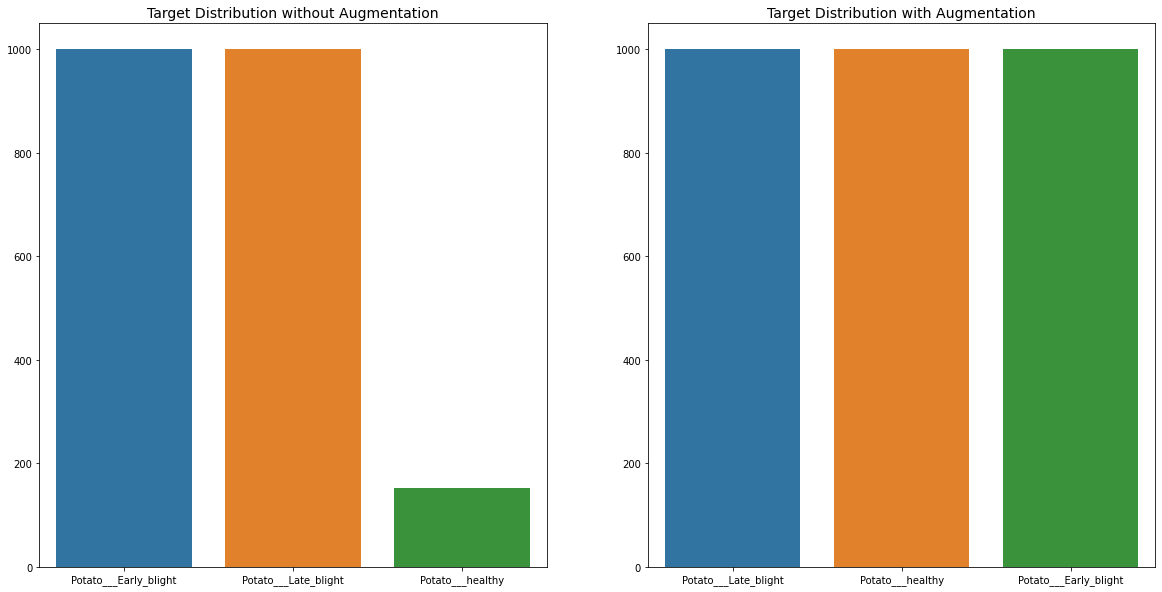

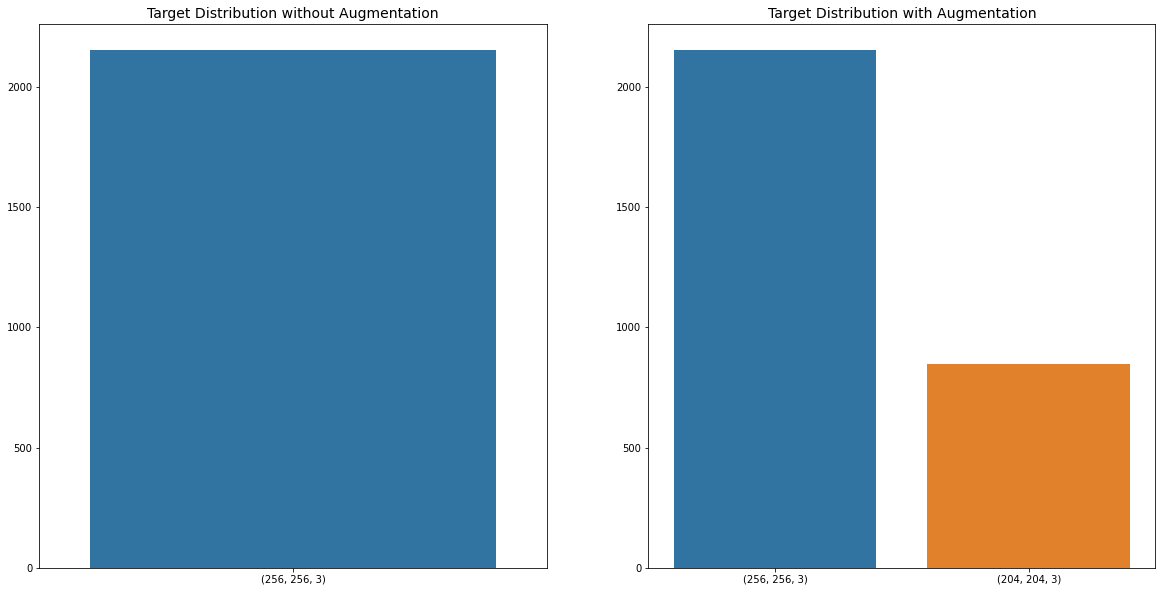

In [14]:
# target distribution visualize between original and augmented images
def distribution(counts_series_original, counts_series_augmented):
  fig = plt.figure(figsize=(20,10))
  fig.add_subplot(121)
  sns.barplot(x = counts_series_original.index, y = counts_series_original.values)
  plt.title('Target Distribution without Augmentation', fontsize=14)
  fig.add_subplot(122)
  sns.barplot(x = counts_series_augmented.index, y = counts_series_augmented.values)
  plt.title('Target Distribution with Augmentation', fontsize=14)

# returns pandas series with classes as keys and count as values for original dataset
target_counts_original = img_df_original['Label'].value_counts()

# returns pandas series with classes as keys and count as values for augmented dataset
target_counts_augmented = img_df_augmented['Label'].value_counts()

# shape analysis for original
shape_counts_original = img_df_original['Shape'].value_counts()

# shape analysis for augmented
shape_counts_augmented = img_df_augmented['Shape'].value_counts()

# visualize target distribution comparison
distribution(target_counts_original, target_counts_augmented)

# visualize shapes distribution comparison
distribution(shape_counts_original, shape_counts_augmented)

* **We can check the data is imbalanced, where very less Healthy image available**
* **All the images are of similar shapes (256,256,3)**

Image shape comparison between different categories 

Shape          Label                
(256, 256, 3)  Potato___Late_blight     1000
               Potato___Early_blight    1000
(204, 204, 3)  Potato___healthy          848
(256, 256, 3)  Potato___healthy          152
dtype: int64



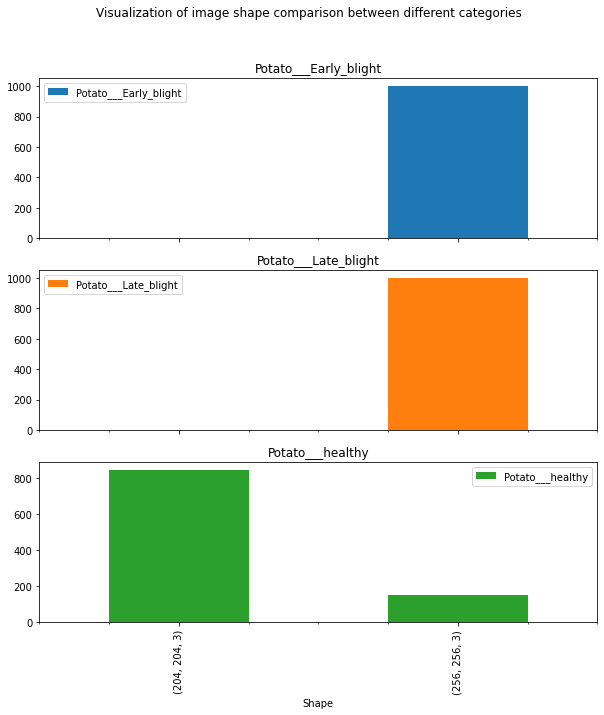

In [41]:
level_shape_df = img_df_augmented[['Shape', 'Label']].value_counts()
print(f'Image shape comparison between different categories \n\n{level_shape_df}\n')

# plotting the multi-index dataframe's hist() plot, where label, and shape are two index
level_shape_df.unstack(level = 1).plot(kind = 'bar', subplots = True, figsize = (10,10), 
                                       title = 'Visualization of image shape comparison between different categories')
plt.show()

## Data Visualization

Sample visualization of 6 of each different categories


In [166]:
def vis(potato_dir, label):
  # choosing 5 random samples from the image list
  vis_images = random.sample(os.listdir(potato_dir), 5)
  fig = plt.figure(figsize=(20,5))
  fig.suptitle(f'Potato Image Samples of category {label}')
  for i,img in enumerate(vis_images):
    fig.add_subplot(1,5,i+1) 
    img_path = os.path.join(potato_dir, img)
    plt.imshow(plt.imread(img_path))

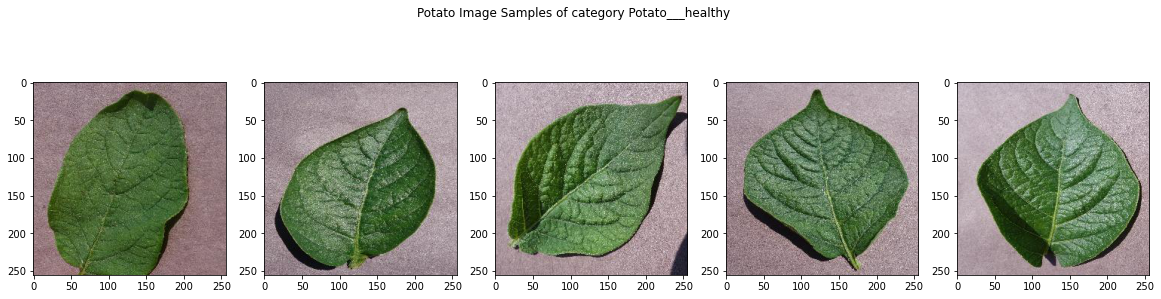

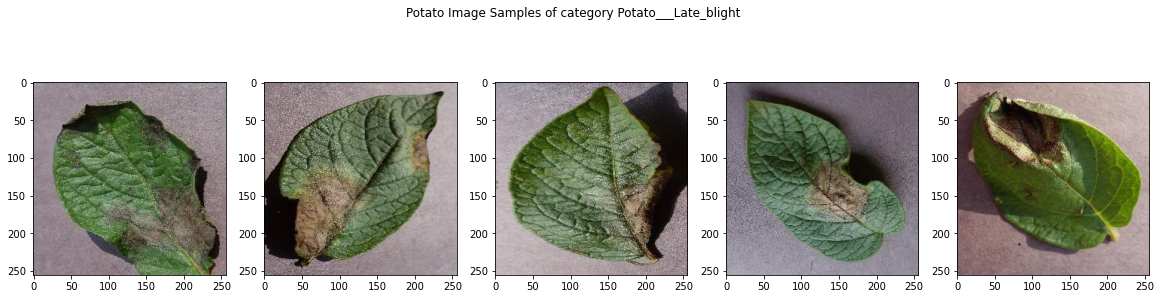

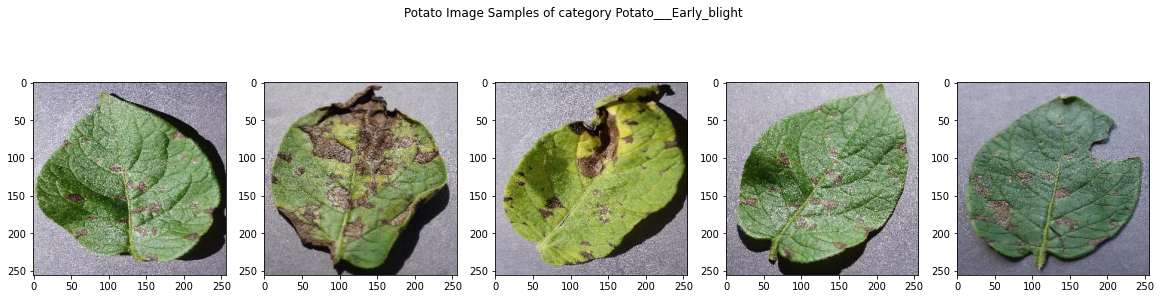

In [167]:
for sr_no,_  in enumerate(potato__classifiers):
  vis(potato_classifiers_path[sr_no], potato__classifiers[sr_no])

Transforming image labels to Scikit Learn LabelBinarizer

In [168]:
potato_classifiers_path[0]

'/content/Plant Village Original/Plant_leave_diseases_dataset_without_augmentation/Potato___healthy'